# THE SPARKS FOUNDATION: DATA SCIENCE AND BUSINESS ANALYTICS

# Task 1: Prediction using Supervised ML

#### AIM : Predict the percentage of a student based on the number  of study hours
#### LANGUAGE  USED : Python 3
#### IDE : Jupyter Notebook
#### TYPE : Linear Regression
#### AUTHOR : Vaishnavi Rathod

### STEPS TO BE FOLLOWED:

##### STEP 1:Import the Dataset
##### STEP 2:Visualize and Analyze the Dataset
##### STEP 3:Prepare the Data
##### STEP 4:Design and Train the Machine Learning Model
##### STEP 5:Visualize the Model
##### STEP 6:Make Predictions
##### STEP 7:Evaluate the Model

## STEP 1: Import the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading data from url

url = "http://bit.ly/w-data"
student_data =pd.read_csv(url)

print("Data imported successfully")
student_data



Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
student_data.shape

#Here we can see that there are 25 rows and 2 columns im the dataset

(25, 2)

In [4]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
student_data.isnull().sum()

#Here we can see that are no NULL values in the dataset that can affect the training of our algorithm

Hours     0
Scores    0
dtype: int64

## STEP 2: Visualize and Analyze the Dataset

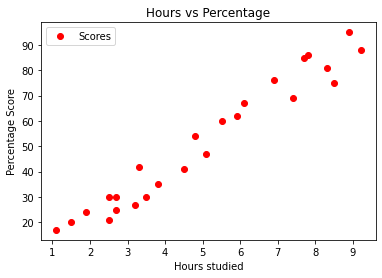

In [6]:
# plotting the distribution of scores and number of hours studied on a 2D graph
student_data.plot(x='Hours',y='Scores',style='ro')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()

From the above graph we can see that there is a positive linear relationship between hours and percentage whivh means that as the number of hours studied increased,the percentage scored also increased.

## STEP 3: Prepare the Data

In [7]:
X = student_data.iloc[:, :-1].values
Y = student_data.iloc[:, 1].values

In [8]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [9]:
#Scores Obtained
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [10]:
# We now split the data into train and test datasets using Scikit-Learn's built-in train_test_split()
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, y_test = train_test_split(X,Y,
                            test_size=0.2, random_state=0)

In [11]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [12]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [13]:
Y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [14]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

## STEP 4: Design and Train the Machine Learning Model

In [15]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

print("Training Complete.")

Training Complete.


## Step 5: Visualize the Model

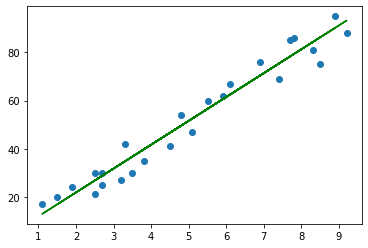

In [16]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data 
plt.scatter(X,Y)
plt.plot(X, line, color='green');
plt.show()

## Step 6- Make Predictions

In [17]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
# Testing with custom data of 9.25 hrs/ day

hours =9.25
own_pred = regressor.predict([[hours]])
print(f"No of Hours = {hours}")
print(f"Predicted Score = {own_pred[0]}")

No of Hours = 9.25
Predicted Score = 93.69173248737538


## Step 7: Evaluate the Model

It is important to evaluate the performance of algorithm to compare how well different algorithms perform on a particular dataset.

###  Mean Absolute Error

In [20]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


### Max Error

In [21]:
print('Max Error:',metrics.max_error(y_test,  y_pred))

Max Error: 6.732260779489842


### Mean Squared Error 

In [22]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 21.5987693072174
